In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import matplotlib.pyplot as plt
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize

In [2]:
pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/data_300pca.pkl')

## Balance the dataset \& create a dataset with 2 characters

In [3]:
# Sheldon : 11484
# Leonard : 9638
Sheldon =  pca_df.loc[pca_df['Person']== 'Sheldon']
Leonard = pca_df.loc[pca_df['Person']== 'Leonard']
df = pd.concat([Sheldon, Leonard], ignore_index=True)
df= df.groupby('Person').apply(lambda x: x.sample(n=9638)).reset_index(drop = True)
print(df.pivot_table(index = ['Person'], aggfunc ='size'))

Person
Leonard    9638
Sheldon    9638
dtype: int64


# Method 1

In [4]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = df['Person']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print('integer_encoded: ',integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['Leonard' 'Leonard' 'Leonard' ... 'Sheldon' 'Sheldon' 'Sheldon']
integer_encoded:  [0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
['Leonard']


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.loc[:,'PCA1':'PCA20']
X = X.values
one_hot = pd.get_dummies(df['Person'])

y = integer_encoded


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test)
y_train, y_test =  np.squeeze(y_train),  np.squeeze(y_test)

model = LogisticRegression(random_state=0).fit(X_train, y_train)
model.predict(X_test)
model.predict_proba(X_test)
print(model.score(X, y))

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

(12850, 20)
(6426, 20)
(12850, 1)
[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]
0.6206163104378501
0.6193588546529722


In [8]:
y_hat = model.predict(X_test)
print(y_hat.shape)
y_test= np.squeeze(y_test)
print(y_test)
print('Misclassification rate:', 100*np.sum(y_hat != y_test)/y_test.shape[0], "%")

predict_prob = model.predict_proba(X_test)
print(predict_prob)
prediction = np.empty(len(X_test), dtype=object)
prediction = model.predict(X_test)
prediction[0:5]  # Inspect the first 5 predictions after labeling.

# Confusion matrix
print("Confusion matrix:\n")
print(pd.crosstab(prediction, y_test, rownames=['Actual'], colnames=['Predicted']), '\n')

# Accuracy
print(f"Accuracy: {np.mean(prediction == y_test):.3f}")

(6426,)
[0 0 1 ... 1 1 0]
Misclassification rate: 38.06411453470277 %
[[0.50099639 0.49900361]
 [0.5261866  0.4738134 ]
 [0.26592851 0.73407149]
 ...
 [0.37215411 0.62784589]
 [0.56211303 0.43788697]
 [0.42769682 0.57230318]]
Confusion matrix:

Predicted     0     1
Actual               
0          1993  1230
1          1216  1987 

Accuracy: 0.619


# Method 2: SML BOOK

In [ ]:
df.describe()

In [ ]:
pd.plotting.scatter_matrix(df.iloc[:, 0:10], figsize=(10,10))
plt.savefig('PCA_table_10.png')
plt.show()

In [9]:
# sampling indices for training
np.random.seed(1)
trainI = np.random.choice(df.shape[0], size=9638, replace=False)
trainIndex = df.index.isin(trainI)
train = df.iloc[trainIndex]  # training set
test = df.iloc[~trainIndex]  # test set

In [10]:
X_train = train[['PCA1', 'PCA2']]
Y_train = train['Person']
X_test = test[['PCA1', 'PCA2']]
Y_test = test['Person']

model = skl_lm.LogisticRegression(solver='lbfgs')

model.fit(X_train, Y_train)
print('Model summary:')
print(model)

Model summary:
LogisticRegression()


In [11]:
predict_prob = model.predict_proba(X_test)
print('The class order in the model:')
print(model.classes_)
print('Examples of predicted probablities for the above classes:')
predict_prob[0:5]   # inspect the first 5 predictions

The class order in the model:
['Leonard' 'Sheldon']
Examples of predicted probablities for the above classes:


array([[0.61127559, 0.38872441],
       [0.60341946, 0.39658054],
       [0.60345779, 0.39654221],
       [0.55234262, 0.44765738],
       [0.55415413, 0.44584587]])

In [12]:
prediction = np.empty(len(X_test), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'Sheldon', 'Leonard')
prediction[0:5]  # Inspect the first 5 predictions after labeling.

array(['Sheldon', 'Sheldon', 'Sheldon', 'Sheldon', 'Sheldon'], dtype='<U7')

In [14]:
y_hat = model.predict(X_test)
print(y_hat.shape)
y_test= np.squeeze(Y_test)
print(Y_test)
print('Misclassification rate:', 100*np.sum(y_hat != Y_test)/Y_test.shape[0], "%")

predict_prob = model.predict_proba(X_test)
print(predict_prob)
prediction = np.empty(len(X_test), dtype=object)
prediction = model.predict(X_test)
prediction[0:5]  # Inspect the first 5 predictions after labeling.

# Confusion matrix
# Confusion matrix
print("Confusion matrix:\n")
print(pd.crosstab(prediction, Y_test), '\n')

# Model score
print('model score',model.score(X_train, Y_train))
# Accuracy
print(f"Accuracy: {np.mean(y_hat == Y_test):.3f}")

print('accuracy_score', accuracy_score(y_hat, Y_test))

(9638,)
1        Leonard
2        Leonard
3        Leonard
8        Leonard
9        Leonard
          ...   
19264    Sheldon
19265    Sheldon
19266    Sheldon
19274    Sheldon
19275    Sheldon
Name: Person, Length: 9638, dtype: object
Misclassification rate: 43.47374974061009 %
[[0.61127559 0.38872441]
 [0.60341946 0.39658054]
 [0.60345779 0.39654221]
 ...
 [0.61908302 0.38091698]
 [0.56866145 0.43133855]
 [0.50222313 0.49777687]]
Confusion matrix:

Person   Leonard  Sheldon
row_0                    
Leonard     2416     1767
Sheldon     2423     3032 

model score 0.5737704918032787
Accuracy: 0.565
accuracy_score 0.5652625025938991


### Decision boundary

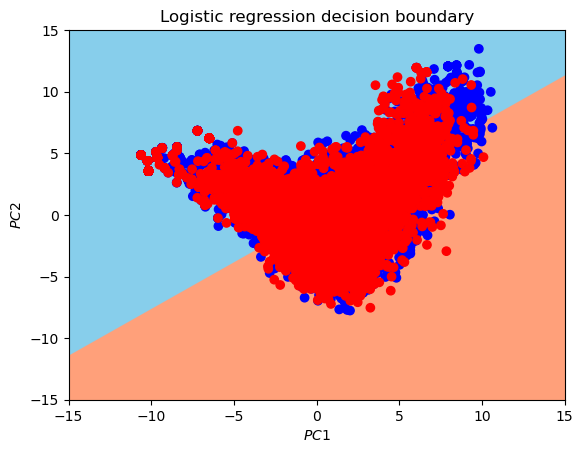

In [15]:
x1 = df['PCA1'].values

x2 = df['PCA2'].values
y = integer_encoded
y = np.squeeze(y)

X = pd.DataFrame({'x1': x1, 'x2': x2})

# learn a logistic regression model
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X, y)

# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(-15, 15 + res, res)
xs2 = np.arange(-15, 15 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)

from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
            extent=[-15,15,-15,15],
           origin='lower',
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('Logistic regression decision boundary')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.xlabel('$PC1$')
plt.ylabel('$PC2$')
plt.savefig('logistic_regression_boundary.png')
plt.show()

## LDA

In [25]:
model = skl_da.LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [26]:
predict_prob = model.predict_proba(X_test)
print('The class order in the model:')

print(model.classes_)
print('Examples of predicted probablities for the above classes:')
with np.printoptions(suppress=True, precision=3): # Supress scientific notaion, e.g. 1.0e-2.
    print(predict_prob[0:5])   # inspect the first 5 predictions

The class order in the model:
['Leonard' 'Sheldon']
Examples of predicted probablities for the above classes:
[[0.609 0.391]
 [0.601 0.399]
 [0.602 0.398]
 [0.551 0.449]
 [0.555 0.445]]


In [27]:
prediction = np.empty(len(X_test), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'Sheldon', 'Leonard')
print("First five predictions:")
print(prediction[0:5], '\n')  # Inspect the first 5 predictions after labeling.

# Confusion matrix
print("Consufion matrix:")
print(pd.crosstab(prediction, Y_test),'\n')

# Accuracy
print(f"Accuracy: {np.mean(prediction == Y_test):.3f}")
print('accuracy_score', accuracy_score(prediction, Y_test))

# Model score
print('model score',model.score(X_train, Y_train))

print('Misclassification rate:', 100*np.sum(prediction != Y_test)/Y_test.shape[0], "%")

First five predictions:
['Sheldon' 'Sheldon' 'Sheldon' 'Sheldon' 'Sheldon'] 

Consufion matrix:
Person   Leonard  Sheldon
row_0                    
Leonard     2433     3046
Sheldon     2406     1753 

Accuracy: 0.434
accuracy_score 0.4343224735422287
model score 0.574496783565055
Misclassification rate: 56.567752645777134 %


### Decision boundary 

In [28]:
data = df['Person']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

['Leonard' 'Leonard' 'Leonard' ... 'Sheldon' 'Sheldon' 'Sheldon']
[0 0 0 ... 1 1 1]


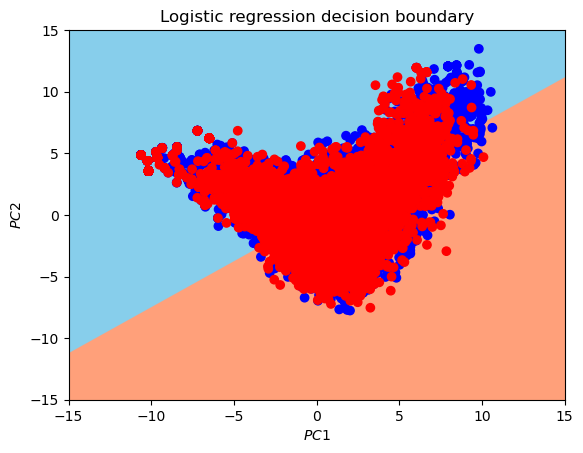

In [29]:
x1 = df['PCA1'].values
x2 = df['PCA2'].values
X = pd.DataFrame({'x1': x1, 'x2': x2})
y = integer_encoded



# classify many points, and plot a colored square around each point
model.fit(X, y)


# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(-15, 15 + res, res)
xs2 = np.arange(-15, 15 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)

from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
            extent=[-15,15,-15,15],
           origin='lower',
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('Logistic regression decision boundary')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.xlabel('$PC1$')
plt.ylabel('$PC2$')
plt.savefig('lda.png')
plt.show()



## QDA

In [30]:
model = skl_da.QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train) 

QuadraticDiscriminantAnalysis()

In [31]:
predict_prob = model.predict_proba(X_test)
print('The class order in the model:')
print(model.classes_, '\n')
print('Examples of predicted probablities for the above classes:')
with np.printoptions(suppress=True, precision=3):
    print(predict_prob[0:5])   # inspect the first 5 predictions

The class order in the model:
['Leonard' 'Sheldon'] 

Examples of predicted probablities for the above classes:
[[0.709 0.291]
 [0.639 0.361]
 [0.613 0.387]
 [0.522 0.478]
 [0.826 0.174]]


In [33]:
prediction = np.empty(len(X_test), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'Sheldon', 'Leonard')
print("First five predictions:")
print(prediction[0:5], '\n')  # Inspect the first 5 predictions after labeling.

# Confusion matrix
print("Consufion matrix:")
print(pd.crosstab(prediction, Y_test),'\n')

# Accuracy
print(f"Accuracy: {np.mean(prediction == Y_test):.3f}")
print('accuracy_score', accuracy_score(prediction, Y_test))

# Model score
print('model score',model.score(X_train, Y_train))

print('Misclassification rate:', 100*np.sum(prediction != Y_test)/Y_test.shape[0], "%")

First five predictions:
['Sheldon' 'Sheldon' 'Sheldon' 'Sheldon' 'Sheldon'] 

Consufion matrix:
Person   Leonard  Sheldon
row_0                    
Leonard     3167     3674
Sheldon     1672     1125 

Accuracy: 0.445
accuracy_score 0.44532060593484124
model score 0.5670263540153558
Misclassification rate: 55.467939406515875 %


In [34]:
data = df['Person']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

['Leonard' 'Leonard' 'Leonard' ... 'Sheldon' 'Sheldon' 'Sheldon']
[0 0 0 ... 1 1 1]


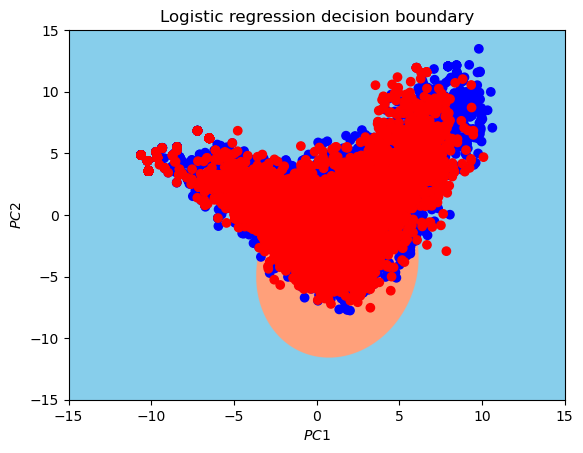

In [35]:
x1 = df['PCA1'].values
x2 = df['PCA2'].values
X = pd.DataFrame({'x1': x1, 'x2': x2})
y = integer_encoded



# classify many points, and plot a colored square around each point
model.fit(X, y)


# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(-15, 15 + res, res)
xs2 = np.arange(-15, 15 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)

from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
            extent=[-15,15,-15,15],
           origin='lower',
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('Logistic regression decision boundary')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.xlabel('$PC1$')
plt.ylabel('$PC2$')
plt.savefig('qda.png')
plt.show()



## KNN

In [36]:
model = skl_nb.KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
prediction = model.predict(X_test)
print('Confusion matrix:\n')
print(pd.crosstab(prediction, Y_test), '\n')
print(f"Accuracy: {np.mean(prediction == Y_test):.3f}")
print('Model score', model.score(X_train,Y_train))
print('Misclassification rate:', 100*np.sum(prediction != Y_test)/Y_test.shape[0], "%")

Confusion matrix:

Person   Leonard  Sheldon
row_0                    
Leonard     2652     2299
Sheldon     2187     2500 

Accuracy: 0.535
Model score 0.9775887113509026
Misclassification rate: 46.544926333264165 %


In [40]:
data = df['Person']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

['Leonard' 'Leonard' 'Leonard' ... 'Sheldon' 'Sheldon' 'Sheldon']
[0 0 0 ... 1 1 1]


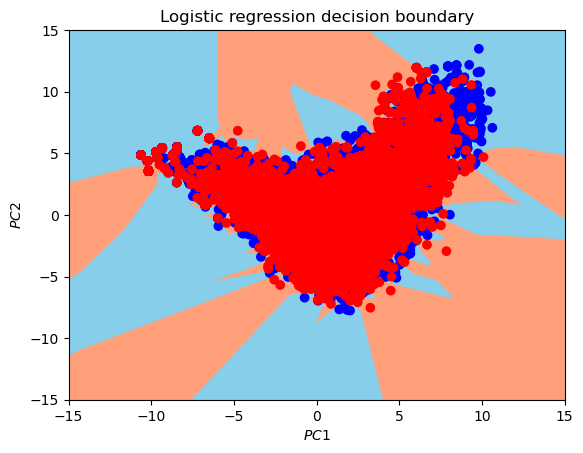

In [43]:
x1 = df['PCA1'].values
x2 = df['PCA2'].values
X = pd.DataFrame({'x1': x1, 'x2': x2})
y = integer_encoded

# classify many points, and plot a colored square around each point
model.fit(X, y)


# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(-15, 15 + res, res)
xs2 = np.arange(-15, 15 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)

from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
            extent=[-15,15,-15,15],
           origin='lower',
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('Logistic regression decision boundary')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.xlabel('$PC1$')
plt.ylabel('$PC2$')
plt.savefig('knn.png')
plt.show()



### Try different values of KNN

In [ ]:
misclassification = []
for k in range(50):  # Try n_neighbors = 1, 2, ...., 50
    model = skl_nb.KNeighborsClassifier(n_neighbors=k+1)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    misclassification.append(np.mean(prediction != Y_test))

K = np.linspace(1, 50, 50)
plt.plot(K, misclassification,'.')
plt.ylabel('Missclasification')
plt.xlabel('Number of neighbors')
plt.show()

### ROC for logistic regression

In [ ]:
true_postive_rate = []
false_positive_rate = []

positive_class = 'Sheldon'
negative_class = 'Leonard'

P = np.sum(Y_test == positive_class) # Number of positive examples in test data
N = np.sum(Y_test == negative_class) # Number of negative samples in test data

threshold = np.linspace(0.00, 1, 101)
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)
predict_prob = model.predict_proba(X_test)
positive_class_index = np.argwhere(model.classes_ == positive_class).squeeze()

for r in threshold:
    prediction = np.where(predict_prob[:, positive_class_index] > r,
                          positive_class,
                          negative_class)
    
    FP = np.sum((prediction==positive_class)&(Y_test==negative_class)) # False Positive
    TP = np.sum((prediction==positive_class)&(Y_test==positive_class)) # True positive
    
    false_positive_rate.append(FP/N)
    true_postive_rate.append(TP/P)

plt.plot(false_positive_rate, true_postive_rate);
for idx in [0, 1, 10, 50, 98, 100]:
    plt.text(false_positive_rate[idx], true_postive_rate[idx], f"r={threshold[idx]:.2f}")
plt.xlim([0,1])
plt.ylim([0,1.1]);
plt.xlabel('False positive rate')
plt.ylabel('True positive rate');

## Multiclassification

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [56]:
character = pca_df['Person'].unique()
count = []
for i in character:
    temp = pca_df.loc[pca_df['Person']==str(i)]
    lenght = len(temp)
    count.append(lenght)
minimum = min(count)
print(minimum)

# New balanced dataset
new_df= pca_df.groupby('Person').apply(lambda x: x.sample(n=minimum)).reset_index(drop = True)
print(new_df.pivot_table(index = ['Person'], aggfunc ='size'))


# define example
data = new_df['Person']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)



2636
Person
Amy           2636
Bernadette    2636
Howard        2636
Leonard       2636
Penny         2636
Raj           2636
Sheldon       2636
dtype: int64
['Amy' 'Amy' 'Amy' ... 'Sheldon' 'Sheldon' 'Sheldon']
[0 0 0 ... 6 6 6]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
['Amy']


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
# Creation of the dataset
from sklearn.model_selection import train_test_split

X = new_df.loc[:,'PCA1':'PCA300']
X = X.values
one_hot = pd.get_dummies(new_df['Person'])
#y = one_hot.values
#y = onehot_encoded
y = integer_encoded


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)
#y = column_or_1d(y, warn=True)

In [65]:
model = skl_lm.LogisticRegression(solver='lbfgs') #This solver is for multiclass problem
model.fit(X_train, y_train)
print('Model summary:')
print(model)
predict_prob = model.predict_proba(X_test)
print('The class order in the model:')
print(model.classes_)

prediction = model.predict(X_test)
print(prediction.shape)
print(y_test.shape)
# Confusion matrix

print("Confusion matrix:\n")
print(pd.crosstab(prediction, y_test), '\n')

# Model score
print('model score',model.score(X_train, y_train))
# Accuracy
print(f"Accuracy: {np.mean(prediction == y_test):.3f}")

print('accuracy_score', accuracy_score(prediction, y_test))
print('Misclassification rate:', 100*np.sum(prediction != y_test)/y_test.shape[0], "%")

Model summary:
LogisticRegression()
The class order in the model:
[0 1 2 3 4 5 6]
(6151,)
(6151,)
Confusion matrix:

col_0    0    1    2    3    4    5    6
row_0                                   
0      220  122  109   96   98  105  104
1      113  234  148  140  133  118   76
2       85  102  158  105  101  130   86
3      109   80  119  131  105   95   83
4       96  119  129  142  248  134   91
5       88   97  130  100  109  189  105
6      156   78  117  137   96  128  357 

model score 0.3278595236159662
Accuracy: 0.250
accuracy_score 0.24987806860673062
Misclassification rate: 75.01219313932694 %
